In [4]:
import math
import sys

import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import ModelTuner
from reclab.environments import Topics
from env_defaults import TOPICS_STATIC, get_len_trial
from reclab.recommenders import RandomRec


In [2]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'
overwrite = False

# Experiment setup.
n_trials = 2
trial_seeds = [i for i in range(n_trials)]
len_trial = get_len_trial(TOPICS_STATIC)
print(len_trial)
# Environment setup
environment_name = TOPICS_STATIC['name']
env = Topics(**TOPICS_STATIC['params'], **TOPICS_STATIC['optional_params'])

# Recommender setup
recommender_name = 'RandomRec'
recommender_class = RandomRec
recommender = recommender_class()

all_ratings, all_predictions, all_dense_ratings, all_dense_predictions = run_env_experiment(
            [env],
            [recommender],
            trial_seeds,
            len_trial,
            environment_names=[environment_name],
            recommender_names=[recommender_name],
            bucket_name=bucket_name,
            data_dir=data_dir,
            overwrite=overwrite)


500
Started experiments on environment: topics_static
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 29.654588235294117%
Running trials for recommender: RandomRec
Running trial with seed: 0
Loading past results from S3 at directory: master/topics_static/RandomRec/trials/seed_0/
Running trial with seed: 1
Loading past results from S3 at directory: master/topics_static/RandomRec/trials/seed_1/


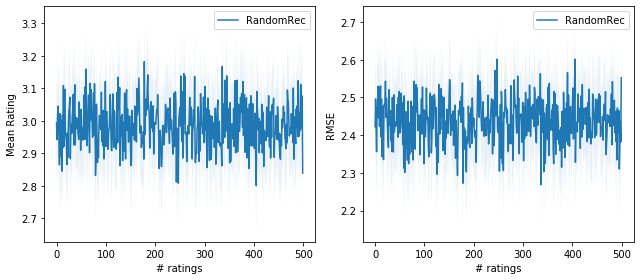

In [9]:
plot_ratings_mses(all_ratings[0],
                      all_predictions[0],
                      [recommender_name],
                      summary_type='mean',
                      num_init_ratings=None, threshold=10)